In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1ab242982ed4c56ff0c9d9bab575545b


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | kargil
Processing Record 2 of Set 12 | isangel
Processing Record 3 of Set 12 | kaitangata
Processing Record 4 of Set 12 | longyearbyen
Processing Record 5 of Set 12 | busselton
Processing Record 6 of Set 12 | atuona
Processing Record 7 of Set 12 | fortuna
Processing Record 8 of Set 12 | rikitea
Processing Record 9 of Set 12 | banikoara
Processing Record 10 of Set 12 | lermontovka
Processing Record 11 of Set 12 | virginia beach
Processing Record 12 of Set 12 | amderma
City not found. Skipping...
Processing Record 13 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 12 | port lincoln
Processing Record 15 of Set 12 | jianhu
Processing Record 16 of Set 12 | udachnyy
Processing Record 17 of Set 12 | punta arenas
Processing Record 18 of Set 12 | victoria
Processing Record 19 of Set 12 | mataura
Processing Record 20 of Set 12 | albany
Processing Record 21 of Set 12 | 

Processing Record 31 of Set 15 | ribeira brava
Processing Record 32 of Set 15 | hobyo
Processing Record 33 of Set 15 | toguchin
Processing Record 34 of Set 15 | severnyy
Processing Record 35 of Set 15 | pimenta bueno
Processing Record 36 of Set 15 | champasak
Processing Record 37 of Set 15 | kaduqli
Processing Record 38 of Set 15 | ribeira grande
Processing Record 39 of Set 15 | cockburn town
Processing Record 40 of Set 15 | hay river
Processing Record 41 of Set 15 | port hardy
Processing Record 42 of Set 15 | vorsma
Processing Record 43 of Set 15 | norman wells
Processing Record 44 of Set 15 | ye
City not found. Skipping...
Processing Record 45 of Set 15 | soto
Processing Record 46 of Set 15 | dikson
Processing Record 47 of Set 15 | misratah
Processing Record 48 of Set 15 | hofn
Processing Record 49 of Set 15 | saint-pierre
Processing Record 50 of Set 15 | kanashevo
Processing Record 1 of Set 16 | hoquiam
Processing Record 2 of Set 16 | saskylakh
Processing Record 3 of Set 16 | alcudi

Processing Record 16 of Set 19 | yeppoon
Processing Record 17 of Set 19 | clyde river
Processing Record 18 of Set 19 | maarianhamina
Processing Record 19 of Set 19 | moose factory
Processing Record 20 of Set 19 | marrakesh
Processing Record 21 of Set 19 | williams lake
Processing Record 22 of Set 19 | mikuni
Processing Record 23 of Set 19 | zambezi
Processing Record 24 of Set 19 | bell ville
Processing Record 25 of Set 19 | bilma
Processing Record 26 of Set 19 | faya
Processing Record 27 of Set 19 | kabin buri
Processing Record 28 of Set 19 | yantal
Processing Record 29 of Set 19 | bonnyville
Processing Record 30 of Set 19 | cao bang
Processing Record 31 of Set 19 | batagay
Processing Record 32 of Set 19 | tarko-sale
Processing Record 33 of Set 19 | thinadhoo
Processing Record 34 of Set 19 | curuguaty
Processing Record 35 of Set 19 | santa maria
Processing Record 36 of Set 19 | santa rosa
Processing Record 37 of Set 19 | namwala
Processing Record 38 of Set 19 | sola
Processing Record 3

Processing Record 3 of Set 23 | cap malheureux
Processing Record 4 of Set 23 | quesnel
Processing Record 5 of Set 23 | mitsamiouli
Processing Record 6 of Set 23 | mehnagar
Processing Record 7 of Set 23 | yulara
Processing Record 8 of Set 23 | tanggu
Processing Record 9 of Set 23 | genhe
Processing Record 10 of Set 23 | shagonar
Processing Record 11 of Set 23 | haibowan
City not found. Skipping...
Processing Record 12 of Set 23 | naze
Processing Record 13 of Set 23 | calabar
Processing Record 14 of Set 23 | sinjah
City not found. Skipping...
Processing Record 15 of Set 23 | humen
Processing Record 16 of Set 23 | etla
Processing Record 17 of Set 23 | baiyin
Processing Record 18 of Set 23 | tabiauea
City not found. Skipping...
Processing Record 19 of Set 23 | lorengau
Processing Record 20 of Set 23 | hit
Processing Record 21 of Set 23 | muromtsevo
Processing Record 22 of Set 23 | nevsehir
Processing Record 23 of Set 23 | comodoro rivadavia
Processing Record 24 of Set 23 | mali
Processing 

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kargil,34.57,76.10,53.91,46,50,5.70,IN,2020-07-11 22:25:49
1,Isangel,-19.55,169.27,77.00,73,20,12.75,VU,2020-07-11 22:19:28
2,Kaitangata,-46.28,169.85,51.01,60,74,15.99,NZ,2020-07-11 22:25:16
3,Longyearbyen,78.22,15.64,44.60,70,40,28.86,SJ,2020-07-11 22:19:17
4,Busselton,-33.65,115.33,46.00,76,0,15.99,AU,2020-07-11 22:23:53
5,Atuona,-9.80,-139.03,79.41,78,40,16.96,PF,2020-07-11 22:23:53
6,Fortuna,40.60,-124.16,70.00,68,90,11.41,US,2020-07-11 22:24:56
7,Rikitea,-23.12,-134.97,69.26,69,11,17.40,PF,2020-07-11 22:23:51
8,Banikoara,11.30,2.44,77.76,79,57,3.15,BJ,2020-07-11 22:25:50
9,Lermontovka,47.15,134.34,65.05,85,100,2.93,RU,2020-07-11 22:25:50


In [21]:
# Arrange columns:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kargil,IN,2020-07-11 22:25:49,34.57,76.10,53.91,46,50,5.70
1,Isangel,VU,2020-07-11 22:19:28,-19.55,169.27,77.00,73,20,12.75
2,Kaitangata,NZ,2020-07-11 22:25:16,-46.28,169.85,51.01,60,74,15.99
3,Longyearbyen,SJ,2020-07-11 22:19:17,78.22,15.64,44.60,70,40,28.86
4,Busselton,AU,2020-07-11 22:23:53,-33.65,115.33,46.00,76,0,15.99
5,Atuona,PF,2020-07-11 22:23:53,-9.80,-139.03,79.41,78,40,16.96
6,Fortuna,US,2020-07-11 22:24:56,40.60,-124.16,70.00,68,90,11.41
7,Rikitea,PF,2020-07-11 22:23:51,-23.12,-134.97,69.26,69,11,17.40
8,Banikoara,BJ,2020-07-11 22:25:50,11.30,2.44,77.76,79,57,3.15
9,Lermontovka,RU,2020-07-11 22:25:50,47.15,134.34,65.05,85,100,2.93


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

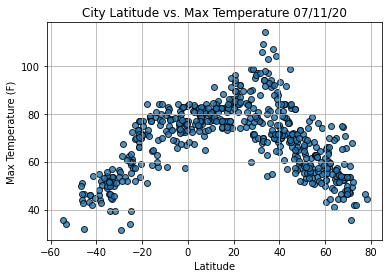

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

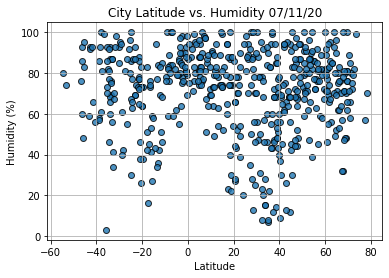

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

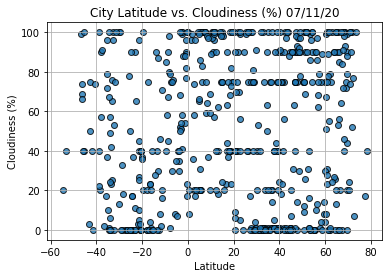

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

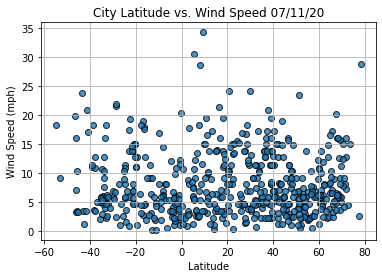

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()